<b><em>Authors:</em></b><br>
Eduardo Paz<br>
Asmaa Abdul-Amin<br>
Parker Link<br>
Ahmed Sachit <br>
Alhassane Moulaye<br>


<h1 style="text-align: center;font-size: 31pt;">CMSC206:&nbsp&nbspData Analysis Project</h1>

In this section, I will import the necessary libraries to download and analyze stock price data for aerospace and defense stocks. I have prefiltered the dataset to focus on financially strong stocks with positive momentum and liquidity. By selecting stocks trading above their 20-day Simple Moving Average (SMA), I emphasize upward trends, with positive Free Cash Flow (FCF) and Gross Margins to ensure profitability and stability. The Aerospace and Defense Industry capitalizes on government contracts and defense spending, while rising volume indicates growing investor interest. This strategy allows for identification of resilient, high-growth stocks with strong market backing. 🚀📊

Below is the full list of aerospace and defense stocks used in this analysis:                     https://drive.google.com/file/d/1_09iFs0UXSXsCOPHFC1H67xQpjdpc1TL/view?usp=sharing

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("dark_background")

In [11]:
# Define the expected file path
file_name = "https://drive.google.com/uc?export=download&id=1Kyky0DRWqLz3JCrPip2r9rzwBYMCozrK"
# Load stock symbols from Google Sheets
df = pd.read_csv(file_name)

# Ensure 'Symbol' column exists
if 'Symbol' not in df.columns:
    raise ValueError("CSV file must contain a 'Symbol' column.")

# Extract symbols
symbols = df["Symbol"].dropna().tolist()
symbols

['RYCEY',
 'HON',
 'RTX',
 'ATRO',
 'TXT',
 'GD',
 'SAABY',
 'FINMY',
 'MHVIY',
 'LHX',
 'LMT',
 'BAESF',
 'RNMBY',
 'THLLY',
 'LDOS',
 'ESLT',
 'TDG',
 'NOC',
 'HII',
 'HAGHY',
 'MHVYF',
 'MTUAY']

In [4]:
tickers = symbols


In [5]:
ohlc = yf.download(tickers, period="max").loc["1990":]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  22 of 22 completed


In [6]:
prices = ohlc["Close"].dropna(how="all")
prices.tail()

Ticker,ATRO,BAESF,ESLT,FINMY,GD,HAGHY,HII,HON,LDOS,LHX,...,MHVYF,MTUAY,NOC,RNMBY,RTX,RYCEY,SAABY,TDG,THLLY,TXT
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-03,19.959999,21.420000,334.600006,25.270000,254.039993,37.174999,172.679993,212.020004,129.199997,207.699997,...,14.00,181.800003,473.410004,249.160004,133.830002,10.18,17.59,1370.819946,50.000000,74.019997
2025-03-04,19.959999,21.000000,340.000000,24.000000,250.800003,41.369999,172.300003,208.000000,132.220001,207.080002,...,15.40,183.199997,463.829987,252.000000,128.699997,10.52,17.59,1349.810059,51.000000,70.190002
2025-03-05,24.910000,21.379999,352.040009,24.790001,262.959991,38.139999,193.589996,209.619995,133.710007,210.529999,...,15.46,190.580002,474.200012,257.600006,129.639999,10.81,18.51,1375.020020,54.549999,72.370003
2025-03-06,24.500000,21.190001,353.760010,24.980000,264.549988,39.360001,193.929993,211.259995,133.059998,213.789993,...,16.76,187.339996,475.200012,258.709991,128.279999,10.51,18.75,1344.680054,54.209999,73.370003
2025-03-07,24.450001,20.250000,357.029999,23.350000,271.559998,34.599998,195.970001,214.520004,139.240005,220.100006,...,17.00,179.000000,486.519989,241.389999,128.399994,10.74,18.02,1341.589966,51.439999,75.419998


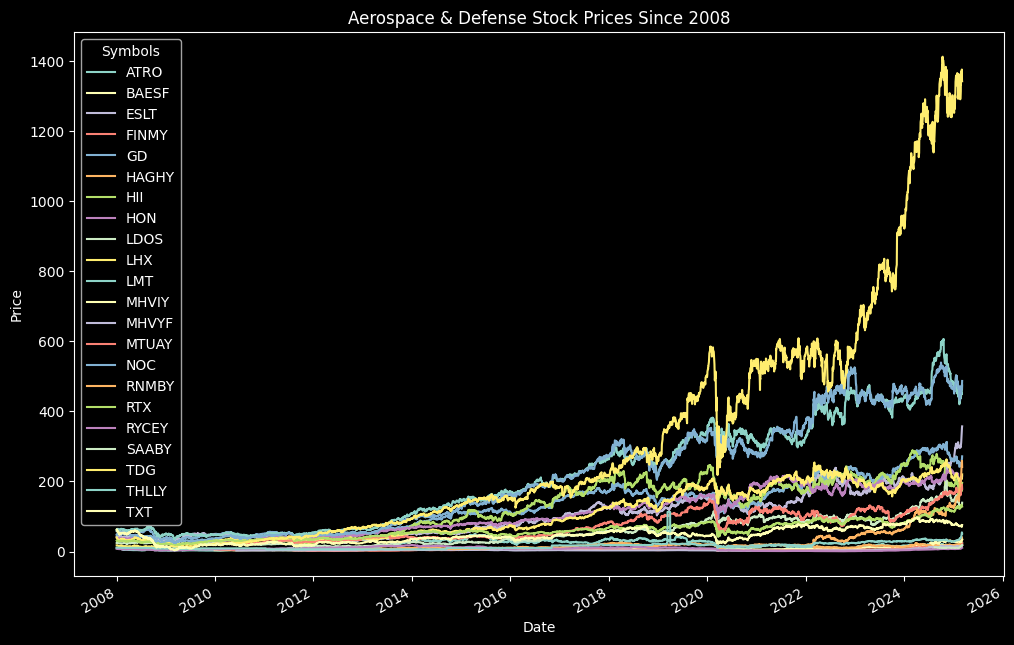

In [104]:
prices[prices.index >= "2008-01-01"].plot(figsize=(12,8))

plt.title("Aerospace & Defense Stock Prices Since 2008")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(title="Symbols")

In [105]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

Ticker
ATRO     0.411547
BAESF    0.155139
ESLT     0.155537
FINMY    0.298310
GD       0.170558
HAGHY    0.230396
HII      0.183538
HON      0.205239
LDOS     0.170693
LHX      0.185486
LMT      0.152459
MHVIY    0.261864
MHVYF    0.080397
MTUAY    0.187460
NOC      0.155503
RNMBY    0.209998
RTX      0.193288
RYCEY    0.268146
SAABY    0.408617
TDG      0.251258
THLLY    0.325903
TXT      0.254476
Name: mkt, dtype: float64

Text(0, 0.5, 'Ticker')

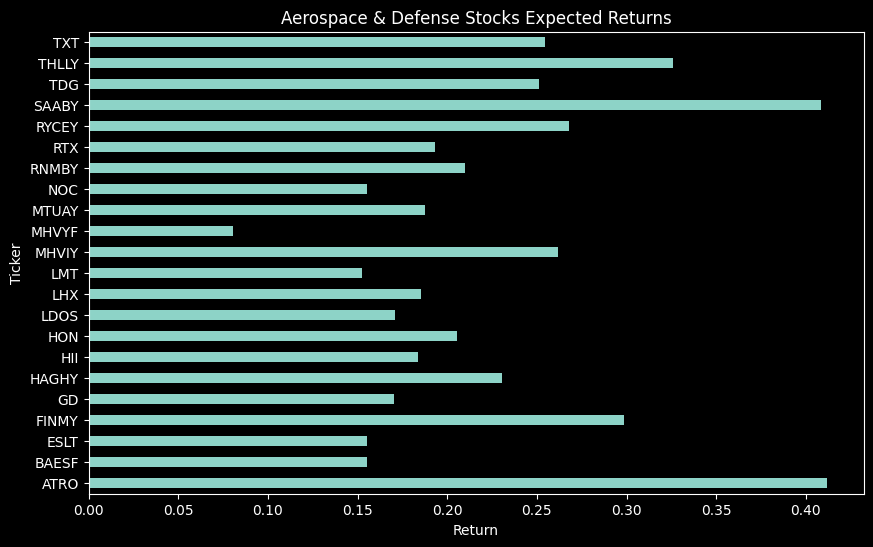

In [106]:
mu.plot.barh(figsize=(10,6));
plt.title("Aerospace & Defense Stocks Expected Returns")
plt.xlabel("Return")
plt.ylabel("Ticker")